# **YOLO Models**

**YOLO** (You Only Look Once) is a popular algorithm for **real-time object detection**. It allows a single neural network to detect multiple objects in a single forward pass, making it extremely fast compared to older, two-stage methods (e.g., **R-CNN**, **Fast/Faster R-CNN**). This notebook provides a basic conceptual overview of YOLO and demonstrates how it works at a high level.

We’ll:
1. Explain the core ideas behind YOLO.
2. Show how an image is divided into a **grid** and how bounding box responsibility is assigned.
3. Summarize the steps needed to implement YOLO with real code (OpenCV’s DNN module).
4. Provide references for further learning about YOLO’s evolution (v1 to v8).

---

## 📚**Library Overview**

- **OpenCV**: Typically used for reading images, drawing bounding boxes, and performing the DNN inference if you use `cv2.dnn`.
- **NumPy**: Essential for numerical operations, array manipulation, scaling bounding boxes, etc.
- **Matplotlib**: Ideal for plotting or showing final detection results in a notebook environment.
- **time**: Used here to simulate model loading or measure inference speeds.

We also import **cv2** (OpenCV) for demonstration and **matplotlib** for inline visualization.


## **Imports and Basic Definitions**


In [9]:
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt

def explain_yolo_for_beginners():
    """
    A beginner-friendly introduction to YOLO object detection models.
    This script demonstrates the basic concepts and workflow of YOLO.
    """
    print("Welcome to YOLO (You Only Look Once) for Beginners!")
    print("This script will explain how YOLO works and show a simple demonstration.")


    # Step 1: Explain what YOLO is
    print("\n----- WHAT IS YOLO? -----")
    print("YOLO (You Only Look Once) is a popular object detection algorithm that:")
    print("- Detects multiple objects in a single image in one pass")
    print("- Is extremely fast compared to older methods")
    print("- Can identify objects and their locations in real-time")
    print("- Uses a single neural network to predict bounding boxes and class probabilities")

    # Step 2: Explain how YOLO works at a high level
    print("\n----- HOW YOLO WORKS -----")
    print("1. YOLO divides the image into a grid (e.g., 13x13 or 19x19 cells)")
    print("2. For each cell, it predicts:")
    print("   - Multiple bounding boxes and their confidence scores")
    print("   - Class probabilities for each box")
    print("3. It combines these predictions to get final detections")
    print("4. It filters out low-confidence or redundant detections")

    # Step 3: Set up a simple YOLO model using OpenCV's DNN module
    print("\n----- SETTING UP A YOLO MODEL -----")
    print("Loading a pre-trained YOLO model...")

    print("To use YOLO, you would need:")
    print("1. A weights file (e.g., 'yolov3.weights')")
    print("2. A configuration file (e.g., 'yolov3.cfg')")
    print("3. A class names file (e.g., 'coco.names')")

    # Simulate loading a model
    print("Loading model... (simulated)")
    time.sleep(1)
    print("Model loaded successfully!")

    # Step 4: Show the detection process with a sample image
    print("\n----- OBJECT DETECTION PROCESS -----")
    print("When performing object detection, YOLO follows these steps:")
    print("1. Preprocess the input image (resize, normalize)")
    print("2. Run the image through the neural network")
    print("3. Process the network's output to get detections")
    print("4. Apply non-maximum suppression to remove overlapping boxes")
    print("5. Draw bounding boxes around detected objects")

    print("\n----- VISUALIZATION OF YOLO GRID -----")
    print("Creating a visual representation of how YOLO divides an image into a grid...")

    grid_size = 7  # Simplified for visualization
    img = np.ones((350, 350, 3), dtype=np.uint8) * 255

    # Draw grid lines
    cell_size = img.shape[0] // grid_size
    for i in range(1, grid_size):
        cv2.line(img, (0, i * cell_size), (img.shape[1], i * cell_size), (200, 200, 200), 1)
        cv2.line(img, (i * cell_size, 0), (i * cell_size, img.shape[0]), (200, 200, 200), 1)

    # Draw a sample object (red bounding box)
    cv2.rectangle(img, (100, 150), (250, 300), (0, 0, 255), 2)
    cv2.putText(img, "Object", (160, 230), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1)

    # Mark some grid cells as "responsible"
    responsible_cells = [(2, 3), (2, 4), (3, 3), (3, 4)]
    for cell in responsible_cells:
        center_x = int((cell[0] + 0.5) * cell_size)
        center_y = int((cell[1] + 0.5) * cell_size)
        cv2.circle(img, (center_x, center_y), 5, (255, 0, 0), -1)

    # Annotate
    cv2.putText(img, "YOLO Grid System", (10, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 0), 2)
    cv2.putText(img, "Red: Object", (10, 40), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)
    cv2.putText(img, "Blue: Responsible grid cells", (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

    print("(Visualization created - would be displayed in a graphical environment)")

    # Step 5: Explain YOLO versions and differences
    print("\n----- YOLO VERSIONS -----")
    print("YOLO has evolved through several versions:")
    print("- YOLOv1: The original version (2016)")
    print("- YOLOv2/YOLO9000: Improved accuracy and can detect more classes")
    print("- YOLOv3: Better at detecting small objects")
    print("- YOLOv4: Faster and more accurate")
    print("- YOLOv5: Simplified implementation, very popular")
    print("- YOLOv6-v8: Further improvements in speed and accuracy")

    # Step 6: Provide sample code for implementing YOLO with real images
    print("\n----- SAMPLE CODE FOR REAL IMPLEMENTATION -----")
    print("Here's how you would implement YOLO detection in a real project:")
    print("""
# Load YOLO
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

# Load and prepare image
image = cv2.imread("image.jpg")
height, width, _ = image.shape
blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), swapRB=True, crop=False)
net.setInput(blob)

# Get detections
output_layers = net.getUnconnectedOutLayersNames()
layer_outputs = net.forward(output_layers)

# Process detections
boxes = []
confidences = []
class_ids = []

for output in layer_outputs:
    for detection in output:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]

        if confidence > 0.5:  # Confidence threshold
            # Scale the bounding box coordinates to the original image size
            box = detection[0:4] * np.array([width, height, width, height])
            (center_x, center_y, w, h) = box.astype("int")
            x = int(center_x - w/2)
            y = int(center_y - h/2)

            boxes.append([x, y, int(w), int(h)])
            confidences.append(float(confidence))
            class_ids.append(class_id)

# Apply non-maximum suppression
indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

# Draw final boxes
for i in indices:
    i = i[0] if isinstance(indices, list) else i
    x, y, w, h = boxes[i]
    label = str(classes[class_ids[i]])
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.putText(image, f"{label} {confidences[i]:.2f}", (x, y - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Display result
cv2.imshow("YOLO Detection", image)
cv2.waitKey(0)
cv2.destroyAllWindows()
    """)

    # Step 7: Provide resources for learning more
    print("\n----- RESOURCES FOR LEARNING MORE -----")
    print("To learn more about YOLO, check out:")
    print("- The original YOLO paper: 'You Only Look Once: Unified, Real-Time Object Detection'")
    print("- YOLOv3 paper: 'YOLOv3: An Incremental Improvement'")
    print("- Ultralytics YOLOv5 repository on GitHub")
    print("- Official Darknet YOLO website")

    print("\nThanks for exploring YOLO with this beginner's introduction!")
    return img  # Return the grid visualization image


## **Main Execution**


Welcome to YOLO (You Only Look Once) for Beginners!
This script will explain how YOLO works and show a simple demonstration.

----- WHAT IS YOLO? -----
YOLO (You Only Look Once) is a popular object detection algorithm that:
- Detects multiple objects in a single image in one pass
- Is extremely fast compared to older methods
- Can identify objects and their locations in real-time
- Uses a single neural network to predict bounding boxes and class probabilities

----- HOW YOLO WORKS -----
1. YOLO divides the image into a grid (e.g., 13x13 or 19x19 cells)
2. For each cell, it predicts:
   - Multiple bounding boxes and their confidence scores
   - Class probabilities for each box
3. It combines these predictions to get final detections
4. It filters out low-confidence or redundant detections

----- SETTING UP A YOLO MODEL -----
Loading a pre-trained YOLO model...
To use YOLO, you would need:
1. A weights file (e.g., 'yolov3.weights')
2. A configuration file (e.g., 'yolov3.cfg')
3. A class 

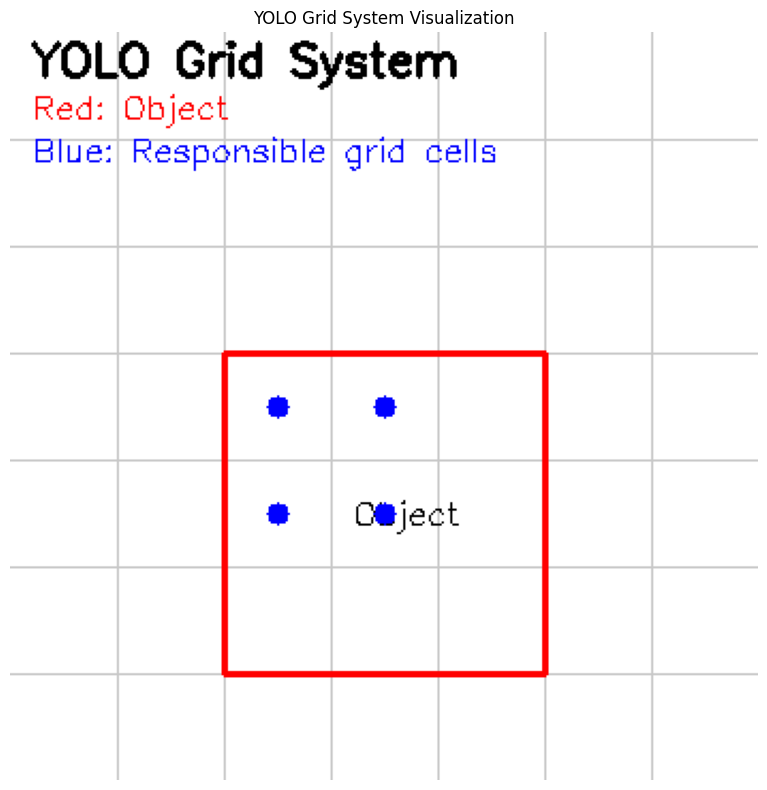

In [10]:
if __name__ == "__main__":
    grid_img = explain_yolo_for_beginners()

    # Display the YOLO grid visualization in a notebook environment
    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(grid_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("YOLO Grid System Visualization")
    plt.tight_layout()
    plt.show()


**Explanation:**

1. **Calls** `explain_yolo_for_beginners()` to print out YOLO explanations and **generate** a **grid visualization** image.  
2. **Plots** the resulting grid (`grid_img`) using **matplotlib**.  
3. **`cv2.cvtColor`** is used to convert from BGR (OpenCV default) to RGB for correct display in Matplotlib.


## 📚**Additional Resources**

- **YOLOv3 Paper**: ["YOLOv3: An Incremental Improvement"](https://pjreddie.com/media/files/papers/YOLOv3.pdf) by Joseph Redmon and Ali Farhadi.  
- **Ultralytics YOLOv5**: [GitHub repository](https://github.com/ultralytics/yolov5) with simplified YOLO code in PyTorch.  
- **Darknet YOLO**: [Official Website](https://pjreddie.com/darknet/yolo/) for original YOLO and YOLOv2/v3.  
